In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Score,Text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [4]:
print(train.columns)
print(train["Score"].value_counts())

Index(['Score', 'Text'], dtype='object')
Score
5    197151
4     43876
1     28521
3     23296
2     16287
Name: count, dtype: int64


In [7]:
valid_score = {1, 2, 3, 4, 5}
unique_score = set(train["Score"].unique())

# Find invalid sentiment labels
invalid_score = unique_score - valid_score

if invalid_score:
    print("Unexpected score labels found:", invalid_score)
    invalid_rows = train[train["Score"].isin(invalid_score)]
    print(invalid_rows)
else:
    print("All sentiments are correctly labeled.")

All sentiments are correctly labeled.


In [8]:
train.describe()

,Score
count,309131.000000
mean,4.180241
std,1.312151
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_11940\1363575255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Score"], palette="viridis")


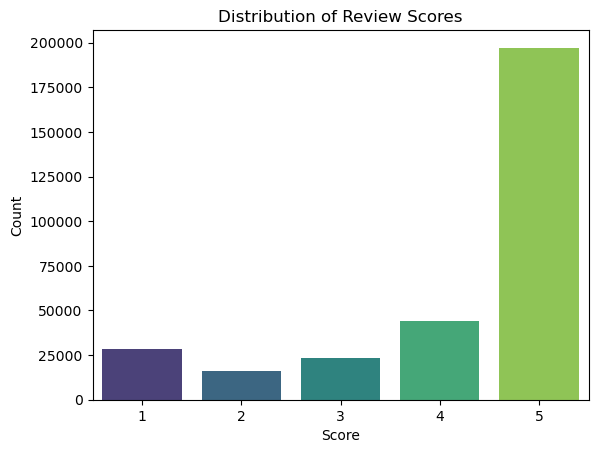

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train["Score"], palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


In [10]:
train['length']=train['Text'].apply(len)
train.head()

,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_11940\1063189245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")


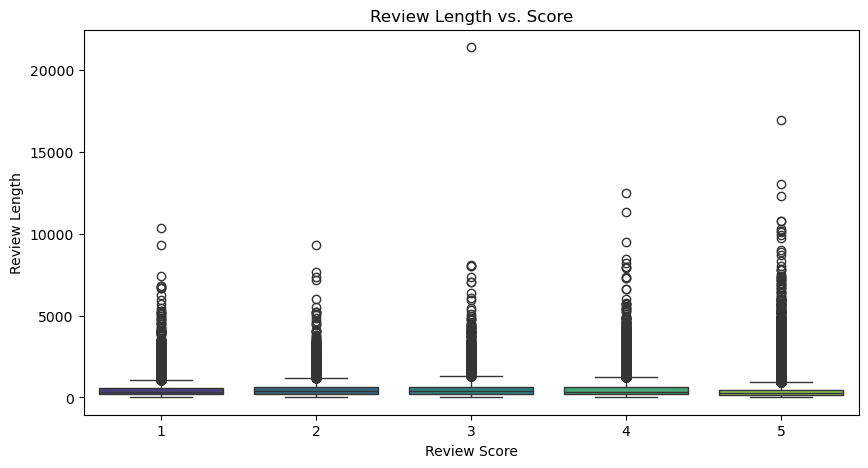

In [12]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")
plt.title("Review Length vs. Score")
plt.xlabel("Review Score")
plt.ylabel("Review Length")
plt.show()

In [13]:
train[["Score", "length"]].corr()

,Score,length
Score,1.000000,-0.068981
length,-0.068981,1.000000
